<a href="https://colab.research.google.com/github/tannerunaveen4/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the project.**

There have been multiple consequences brought about by the covid-19 across different continents and nations This is a project that particularly analyses the states within the USA, primarily looking at the state of Illinois. This focuses on examining how the number of reported cases correlates with deaths.

The objectives for this project are as follows:

*   Determine the relationship of cases and deaths reported.
*   Divide the data set to discuss the situation in Illinois only.
*   Discover the connection between deaths in US and the illinois’s death.


The review is intended to help doctors understand the line with cases and deaths in Illinois. This study may have wide implications for all of the US states, but here the concentration is on Illinois state.





# **1. Data retrieval & manipulation**

**1.1 Data sources.**

The following data sources have been used.



1.   https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv The source been github and this is a csv file.
2.   https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv The source also being the github and this is a csv file.
3. https://drive.google.com/uc?id=1KtSM_1WM9u-1o8tf0C6aXcu785BQ6MOo the source being kaggle but saved in google for easy retrival.






**1.2 US- states dataset.**


It contains Covid data for the States’ population and related indicators in the US. The dataset consists of five columns:


**Date:** It denotes the date of recording of Covid-19 figures. Temporal analysis is possible because each entry corresponds to one particular day.


**State:** State means the specific district of the country, US. This column refers to a certain state, enabling division of information using geographical barriers.


**FIPS (Federal Information Processing Standards) Code:** The state abbreviated name and its corresponding FIPS code are mentioned in this column. These are the unique identifiers of the federal department that distinguishes geographic units for example states and countries in a more distinctive manner as FIPS codes. This dataset contains a FIPS code for purposes of facilitating the data linkage and exchange.


**Cases:** The cases entry shows the total number of confirmed COVID-19 cases that were recorded in a certain state at a specific point in time. It is informative as to how the virus was spreading in different states as time progressed.

**Deaths:** The column labeled “deaths” shows the running total number of Covid-19 related deaths for each state recorded at a selected time. This metric is very important to assessing how severe/bad was the pandemic, relative to a particular region.

In [33]:
# Read in covid data file from the website
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
covid.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [34]:
#displaying the columns in the dataset.
covid.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [35]:
#getting the number of rows and columns in the dataset.
covid.shape

(61942, 5)

In [36]:
#printing the unique state names in the dataset.
unique_states = set(covid['state'])
unique_states_list = list(unique_states)
print("Unique States:", unique_states_list)

Unique States: ['Florida', 'District of Columbia', 'Pennsylvania', 'Colorado', 'Mississippi', 'Virginia', 'Hawaii', 'South Carolina', 'Minnesota', 'Louisiana', 'Utah', 'Georgia', 'New Hampshire', 'Arkansas', 'Alaska', 'Kentucky', 'Guam', 'New Mexico', 'California', 'West Virginia', 'Nebraska', 'Tennessee', 'Delaware', 'Iowa', 'South Dakota', 'Wisconsin', 'Maryland', 'Vermont', 'Michigan', 'New Jersey', 'Ohio', 'Massachusetts', 'Washington', 'North Dakota', 'Oregon', 'Alabama', 'Idaho', 'Puerto Rico', 'Texas', 'American Samoa', 'Illinois', 'Northern Mariana Islands', 'Maine', 'Rhode Island', 'North Carolina', 'Indiana', 'Missouri', 'Connecticut', 'Arizona', 'Montana', 'New York', 'Nevada', 'Wyoming', 'Virgin Islands', 'Oklahoma', 'Kansas']


In [37]:
#getting the lenght of the unique states.
len(unique_states_list)

56

In [38]:
unique_date = set(covid['date'])
unique_date_list = list(unique_date)
print("Unique dates:", unique_date_list)

Unique dates: ['2020-06-01', '2023-01-17', '2020-09-03', '2022-01-29', '2021-08-12', '2021-02-01', '2020-11-12', '2021-06-03', '2022-05-08', '2020-06-16', '2020-12-17', '2023-02-11', '2023-03-03', '2023-03-08', '2021-09-17', '2020-08-20', '2020-07-20', '2020-03-28', '2020-03-20', '2022-11-27', '2023-03-20', '2020-03-05', '2020-04-02', '2022-05-01', '2022-11-06', '2022-08-16', '2020-09-16', '2020-07-31', '2021-08-17', '2022-02-09', '2021-12-15', '2023-03-22', '2021-12-12', '2021-07-10', '2022-04-09', '2022-10-10', '2021-08-25', '2020-06-20', '2020-03-10', '2020-01-22', '2020-06-09', '2020-05-09', '2022-05-04', '2022-01-07', '2022-10-08', '2023-01-13', '2020-03-03', '2020-05-14', '2021-04-28', '2022-07-12', '2020-10-30', '2022-02-21', '2022-04-15', '2020-04-28', '2022-07-23', '2020-07-27', '2023-03-19', '2022-09-12', '2021-07-03', '2022-06-09', '2022-02-08', '2022-04-19', '2021-09-06', '2022-07-13', '2022-07-22', '2020-12-11', '2021-06-17', '2020-12-28', '2021-07-28', '2020-11-10', '2020

In [39]:
len(unique_date_list)

1158

In [40]:
#changing into correct datetime format
covid['date'] = pd.to_datetime(covid['date']).dt.date

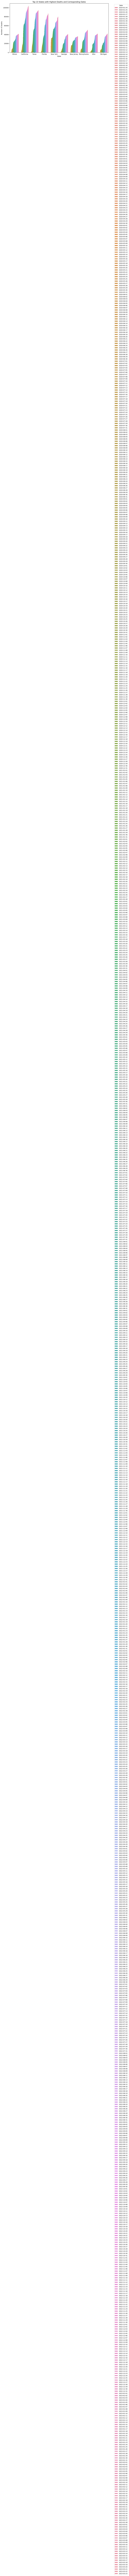

In [9]:
#performing aggrestion on the dataset based on the states and deaths.
top_states = covid.groupby('state')['deaths'].max().nlargest(10).index
top_states_data = covid[covid['state'].isin(top_states)]

# Create a bar graph using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='deaths', hue='date', data=top_states_data, errorbar=None)

plt.title('Top 10 States with Highest Deaths and Corresponding Dates')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
#generating the pivot table for the dataset.
pivot_table = pd.pivot_table(covid, values=['cases', 'deaths'], index=['date'], columns=['state'], aggfunc='sum', fill_value=0)
pivot_table

cases                                                      \
state       Alabama  Alaska American Samoa  Arizona Arkansas California   
date                                                                      
2020-01-21        0       0              0        0        0          0   
2020-01-22        0       0              0        0        0          0   
2020-01-23        0       0              0        0        0          0   
2020-01-24        0       0              0        0        0          0   
2020-01-25        0       0              0        0        0          1   
...             ...     ...            ...      ...      ...        ...   
2023-03-19  1646423  308399           8320  2448406  1008303   12153083   
2023-03-20  1646423  308399           8320  2448406  1008303   12154293   
2023-03-21  1646423  308893           8320  2448406  1008303   12154941   
2023-03-22  1648385  308893           8320  2451062  1008303   12155467   
2023-03-23  1648385  308893           8321  2451062  1008303   12169158   

                                                               ...    deaths  \
state      Colorado Connecticut Delaware District of Columbia  ... Tennessee   
date                                                           ...             
2020-01-21        0           0        0                    0  ...         0   
2020-01-22        0           0        0                    0  ...         0   
2020-01-23        0           0        0                    0  ...         0   
2020-01-24        0           0        0                    0  ...         0   
2020-01-25        0           0        0                    0  ...         0   
...             ...         ...      ...                  ...  ...       ...   
2023-03-19  1769225      977939   332526               178106  ...     29005   
2023-03-20  1769872      977982   332526               178106  ...     29005   
2023-03-21  1770192      978197   332526               178106  ...     29005   
2023-03-22  1770649      978330   332861               178106  ...     29035   
2023-03-23  1771010      978456   332861               178226  ...     29035   

                                                                    \
state       Texas  Utah Vermont Virgin Islands Virginia Washington   
date                                                                 
2020-01-21      0     0       0              0        0          0   
2020-01-22      0     0       0              0        0          0   
2020-01-23      0     0       0              0        0          0   
2020-01-24      0     0       0              0        0          0   
2020-01-25      0     0       0              0        0          0   
...           ...   ...     ...            ...      ...        ...   
2023-03-19  94446  5309     932            130    23775      15859   
2023-03-20  94450  5309     932            130    23775      15859   
2023-03-21  94450  5309     932            130    23782      15859   
2023-03-22  94515  5309     932            130    23782      15905   
2023-03-23  94518  5316     939            130    23782      15905   

                                            
state      West Virginia Wisconsin Wyoming  
date                                        
2020-01-21             0         0       0  
2020-01-22             0         0       0  
2020-01-23             0         0       0  
2020-01-24             0         0       0  
2020-01-25             0         0       0  
...                  ...       ...     ...  
2023-03-19          8126     16457    2009  
2023-03-20          8126     16457    2009  
2023-03-21          8126     16474    2014  
2023-03-22          8132     16483    2014  
2023-03-23          8132     16485    2014  

[1158 rows x 112 columns]

<ipython-input-11-a4a632b21692>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='cases', y='deaths', palette='viridis', data=covid, sizes=(50, 200), legend='full')


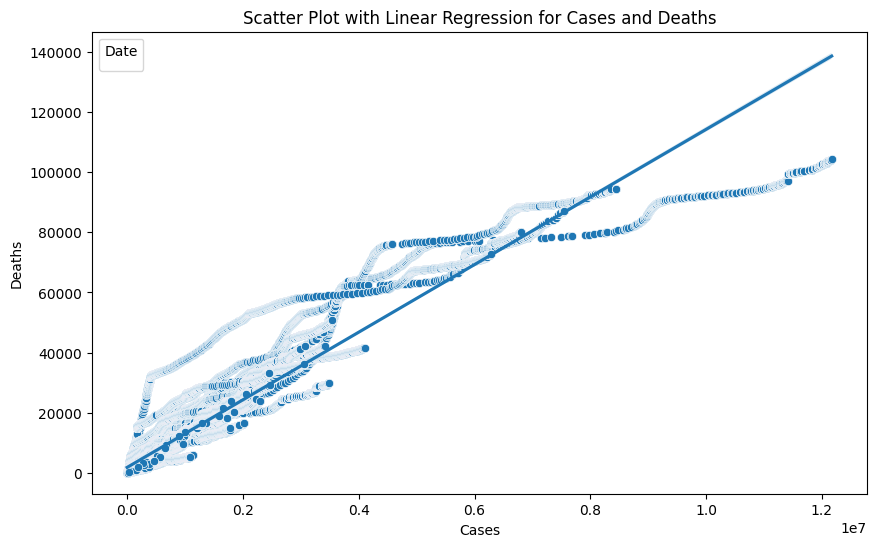

In [11]:
#plotting correlation between cases and deaths.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cases', y='deaths', palette='viridis', data=covid, sizes=(50, 200), legend='full')
sns.regplot(x='cases', y='deaths', data=covid, scatter=False)
plt.title('Scatter Plot with Linear Regression for Cases and Deaths')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend(title='Date')
plt.show()

**Graph analysis.**

The graph above shows that the data set is directly proportional to the cases and deaths. This visual image illustrates a kind of correlativity that exists between these two elements and implies similarity of them in nature or tendencies.

In [12]:
# Descriptive statistics
# Aggregating deaths and cases
covid['deaths'].groupby(covid['cases']).agg(['count','min','mean','median','max', 'std','var'])

count     min           mean    median     max      std       var
cases                                                                      
1           228       0       0.000000       0.0       0  0.00000  0.000000
2           113       0       0.000000       0.0       0  0.00000  0.000000
3            56       0       0.000000       0.0       0  0.00000  0.000000
4            57       0       0.000000       0.0       0  0.00000  0.000000
5            47       0       0.042553       0.0       1  0.20403  0.041628
...         ...     ...            ...       ...     ...      ...       ...
12153083      1  104130  104130.000000  104130.0  104130      NaN       NaN
12154293      1  104165  104165.000000  104165.0  104165      NaN       NaN
12154941      1  104185  104185.000000  104185.0  104185      NaN       NaN
12155467      1  104196  104196.000000  104196.0  104196      NaN       NaN
12169158      1  104277  104277.000000  104277.0  104277      NaN       NaN

[42710 rows x 7 columns]

In [13]:
# Descriptive statistics
covid['cases'].groupby(covid['deaths']).agg(['count','min','mean','median','max', 'std','var'])

count       min          mean      median       max         std  \
deaths                                                                    
0        1152         1  7.342101e+01         8.0      3756  362.284197   
1         164         5  9.647561e+01        58.0       562   97.352087   
2         649         7  1.306918e+02       128.0       719   95.286640   
3         137        17  3.262555e+02       289.0      1182  258.659213   
4          63        59  2.782540e+02       248.0       972  198.001464   
...       ...       ...           ...         ...       ...         ...   
104130      3  12153079  1.215308e+07  12153079.0  12153083    2.309401   
104165      1  12154293  1.215429e+07  12154293.0  12154293         NaN   
104185      1  12154941  1.215494e+07  12154941.0  12154941         NaN   
104196      1  12155467  1.215547e+07  12155467.0  12155467         NaN   
104277      1  12169158  1.216916e+07  12169158.0  12169158         NaN   

                  var  
deaths                 
0       131249.839107  
1         9477.428849  
2         9079.543776  
3        66904.588665  
4        39204.579621  
...               ...  
104130       5.333333  
104165            NaN  
104185            NaN  
104196            NaN  
104277            NaN  

[19076 rows x 7 columns]

In [14]:
# Descriptive statistics
covid.groupby(covid['cases']).agg(['count','min','mean','median','max', 'std','var'])

<ipython-input-14-135782d132d4>:2: FutureWarning: ['date', 'state'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  covid.groupby(covid['cases']).agg(['count','min','mean','median','max', 'std','var'])


fips                                                  deaths  \
         count min       mean median max        std         var  count   
cases                                                                    
1          228   2  34.618421   38.0  78  20.307309  412.386796    228   
2          113   4  29.238938   25.0  78  17.525631  307.147756    113   
3           56   2  44.178571   49.0  78  21.148056  447.240260     56   
4           57  10  43.140351   48.0  72  18.741130  351.229950     57   
5           47   4  45.702128   53.0  72  18.769674  352.300648     47   
...        ...  ..        ...    ...  ..        ...         ...    ...   
12153083     1   6   6.000000    6.0   6        NaN         NaN      1   
12154293     1   6   6.000000    6.0   6        NaN         NaN      1   
12154941     1   6   6.000000    6.0   6        NaN         NaN      1   
12155467     1   6   6.000000    6.0   6        NaN         NaN      1   
12169158     1   6   6.000000    6.0   6        NaN         NaN      1   

                                                                      
             min           mean    median     max      std       var  
cases                                                                 
1              0       0.000000       0.0       0  0.00000  0.000000  
2              0       0.000000       0.0       0  0.00000  0.000000  
3              0       0.000000       0.0       0  0.00000  0.000000  
4              0       0.000000       0.0       0  0.00000  0.000000  
5              0       0.042553       0.0       1  0.20403  0.041628  
...          ...            ...       ...     ...      ...       ...  
12153083  104130  104130.000000  104130.0  104130      NaN       NaN  
12154293  104165  104165.000000  104165.0  104165      NaN       NaN  
12154941  104185  104185.000000  104185.0  104185      NaN       NaN  
12155467  104196  104196.000000  104196.0  104196      NaN       NaN  
12169158  104277  104277.000000  104277.0  104277      NaN       NaN  

[42710 rows x 14 columns]

# **Covid Dataset**.



In [15]:
#dataset loading.
covid_master = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv')
covid_master.head()

date_of_interest  CASE_COUNT  PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  \
0       02/29/2020           1                    0                   1   
1       03/01/2020           0                    0                   1   
2       03/02/2020           0                    0                   2   
3       03/03/2020           1                    0                   7   
4       03/04/2020           5                    0                   2   

   DEATH_COUNT  CASE_COUNT_7DAY_AVG  ALL_CASE_COUNT_7DAY_AVG  \
0            0                    0                        0   
1            0                    0                        0   
2            0                    0                        0   
3            0                    0                        0   
4            0                    0                        0   

   HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  BX_CASE_COUNT  ...  \
0                    0                     0              0  ...   
1                    0                     0              0  ...   
2                    0                     0              0  ...   
3                    0                     0              0  ...   
4                    0                     0              0  ...   

   SI_CASE_COUNT  SI_PROBABLE_CASE_COUNT  SI_HOSPITALIZED_COUNT  \
0              0                       0                      0   
1              0                       0                      0   
2              0                       0                      0   
3              0                       0                      0   
4              0                       0                      0   

   SI_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  SI_PROBABLE_CASE_COUNT_7DAY_AVG  \
0               0                       0                                0   
1               0                       0                                0   
2               0                       0                                0   
3               0                       0                                0   
4               0                       0                                0   

   SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   SI_DEATH_COUNT_7DAY_AVG  INCOMPLETE  
0                        0           0  
1                        0           0  
2                        0           0  
3                        0           0  
4                        0           0  

[5 rows x 55 columns]

In [16]:
covid_master.columns

Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG',
       'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT',
       'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
       'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
       'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG',
       'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
       'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
       'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG',
       'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
       'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7

In [17]:
covid_master.shape

(1382, 55)

In [18]:
covid_master['date_of_interest'] = pd.to_datetime(covid_master['date_of_interest'])

In [19]:
covid_master = covid_master.rename(columns={'date_of_interest': 'date'})

In [20]:
covid_master['date'] = pd.to_datetime(covid_master['date']).dt.date

In [21]:
covid['date']

0        2020-01-21
1        2020-01-22
2        2020-01-23
3        2020-01-24
4        2020-01-24
            ...    
61937    2023-03-23
61938    2023-03-23
61939    2023-03-23
61940    2023-03-23
61941    2023-03-23
Name: date, Length: 61942, dtype: object

In [22]:
covid_master['date']

0       2020-02-29
1       2020-03-01
2       2020-03-02
3       2020-03-03
4       2020-03-04
           ...    
1377    2023-12-07
1378    2023-12-08
1379    2023-12-09
1380    2023-12-10
1381    2023-12-11
Name: date, Length: 1382, dtype: object

In [23]:
#merging the two datasets.
merged_df = pd.merge(covid, covid_master, on=['date'], how='left')
merged_df.shape

(61942, 59)

In [24]:
merged_df.head()

date       state  fips  cases  deaths  CASE_COUNT  \
0  2020-01-21  Washington    53      1       0         NaN   
1  2020-01-22  Washington    53      1       0         NaN   
2  2020-01-23  Washington    53      1       0         NaN   
3  2020-01-24    Illinois    17      1       0         NaN   
4  2020-01-24  Washington    53      1       0         NaN   

   PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  CASE_COUNT_7DAY_AVG  \
0                  NaN                 NaN          NaN                  NaN   
1                  NaN                 NaN          NaN                  NaN   
2                  NaN                 NaN          NaN                  NaN   
3                  NaN                 NaN          NaN                  NaN   
4                  NaN                 NaN          NaN                  NaN   

   ...  SI_CASE_COUNT  SI_PROBABLE_CASE_COUNT  SI_HOSPITALIZED_COUNT  \
0  ...            NaN                     NaN                    NaN   
1  ...            NaN                     NaN                    NaN   
2  ...            NaN                     NaN                    NaN   
3  ...            NaN                     NaN                    NaN   
4  ...            NaN                     NaN                    NaN   

   SI_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  SI_PROBABLE_CASE_COUNT_7DAY_AVG  \
0             NaN                     NaN                              NaN   
1             NaN                     NaN                              NaN   
2             NaN                     NaN                              NaN   
3             NaN                     NaN                              NaN   
4             NaN                     NaN                              NaN   

   SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
0                         NaN                             NaN   
1                         NaN                             NaN   
2                         NaN                             NaN   
3                         NaN                             NaN   
4                         NaN                             NaN   

   SI_DEATH_COUNT_7DAY_AVG  INCOMPLETE  
0                      NaN         NaN  
1                      NaN         NaN  
2                      NaN         NaN  
3                      NaN         NaN  
4                      NaN         NaN  

[5 rows x 59 columns]

In [25]:
#filtering the dataset to only illinois state.
Illinois_df = merged_df[merged_df['state'] == 'Illinois']
Illinois_df.shape

(1155, 59)

In [26]:
#getting the columns in the datatset
Illinois_df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'CASE_COUNT',
       'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT',
       'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT',
       'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
       'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
       'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG',
       'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
       'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
       'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG',
       'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
       'MN_HOSPITALIZED_COUNT_7DAY

In [27]:
#Drop null rows in the dataset.
Illinois_df_cleaned = Illinois_df.dropna()
Illinois_df_cleaned.shape

(1119, 59)

In [28]:
Illinois_df_cleaned.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'CASE_COUNT',
       'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT',
       'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT',
       'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
       'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
       'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG',
       'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
       'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
       'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG',
       'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
       'MN_HOSPITALIZED_COUNT_7DAY

In [29]:
Illinois_df_cleaned.head()

date     state  fips  cases  deaths  CASE_COUNT  \
232  2020-02-29  Illinois    17      3       0         1.0   
243  2020-03-01  Illinois    17      3       0         0.0   
257  2020-03-02  Illinois    17      4       0         0.0   
272  2020-03-03  Illinois    17      4       0         1.0   
288  2020-03-04  Illinois    17      4       0         5.0   

     PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
232                  0.0                 1.0          0.0   
243                  0.0                 1.0          0.0   
257                  0.0                 2.0          0.0   
272                  0.0                 7.0          0.0   
288                  0.0                 2.0          0.0   

     CASE_COUNT_7DAY_AVG  ...  SI_CASE_COUNT  SI_PROBABLE_CASE_COUNT  \
232                  0.0  ...            0.0                     0.0   
243                  0.0  ...            0.0                     0.0   
257                  0.0  ...            0.0                     0.0   
272                  0.0  ...            0.0                     0.0   
288                  0.0  ...            0.0                     0.0   

     SI_HOSPITALIZED_COUNT  SI_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  \
232                    0.0             0.0                     0.0   
243                    0.0             0.0                     0.0   
257                    0.0             0.0                     0.0   
272                    0.0             0.0                     0.0   
288                    0.0             0.0                     0.0   

     SI_PROBABLE_CASE_COUNT_7DAY_AVG  SI_ALL_CASE_COUNT_7DAY_AVG  \
232                              0.0                         0.0   
243                              0.0                         0.0   
257                              0.0                         0.0   
272                              0.0                         0.0   
288                              0.0                         0.0   

     SI_HOSPITALIZED_COUNT_7DAY_AVG  SI_DEATH_COUNT_7DAY_AVG  INCOMPLETE  
232                             0.0                      0.0         0.0  
243                             0.0                      0.0         0.0  
257                             0.0                      0.0         0.0  
272                             0.0                      0.0         0.0  
288                             0.0                      0.0         0.0  

[5 rows x 59 columns]

In [30]:
#filtering to specific columns for analysis in order to fullfill the context of the project
Illinois_df_cleaned = pd.DataFrame(Illinois_df_cleaned)
selected_columns = ['date', 'state', 'fips', 'cases', 'deaths', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']
Illinois_df_columns = Illinois_df_cleaned[selected_columns]
Illinois_df_columns.shape

(1119, 9)

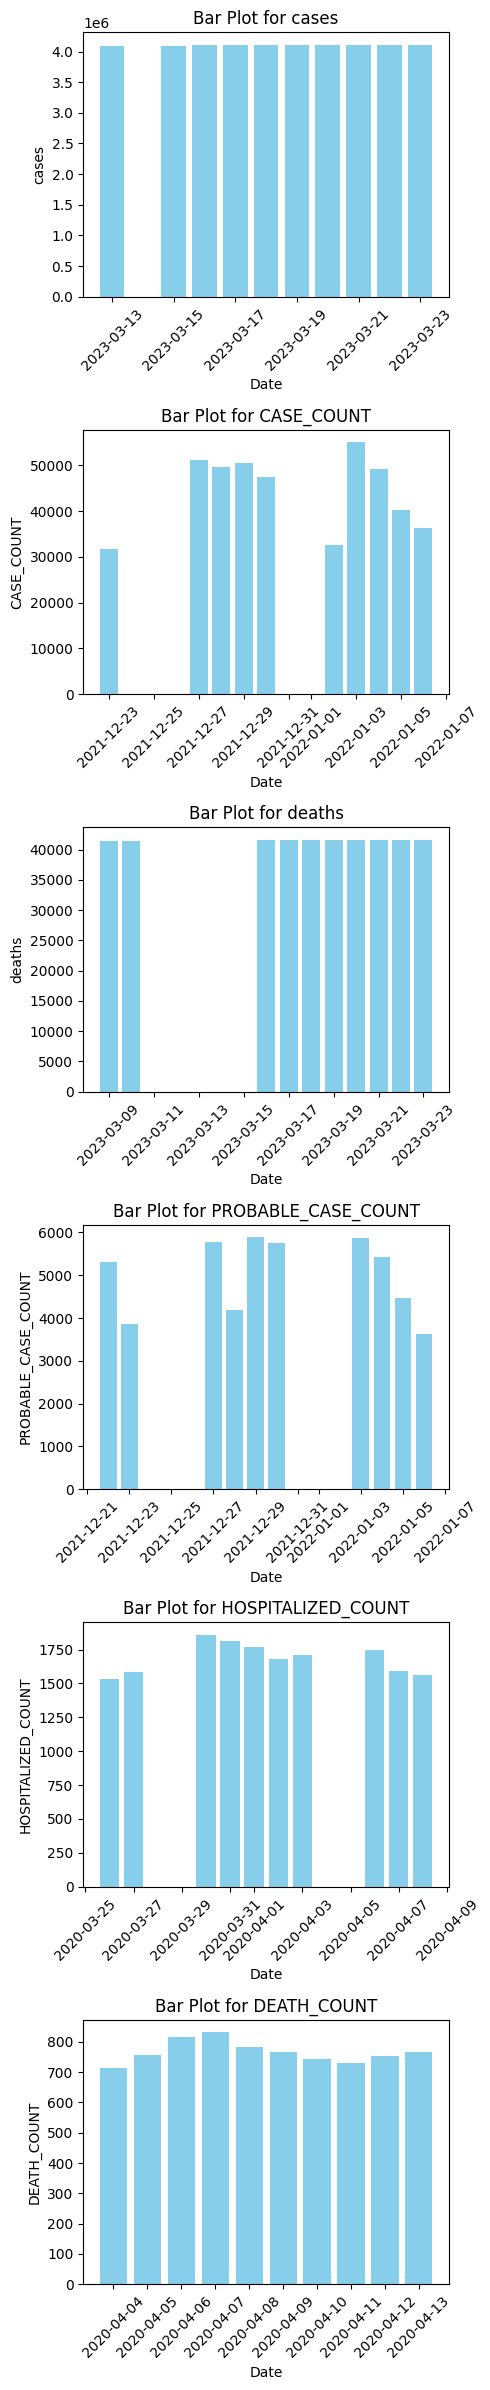

In [31]:
#plotting the distribution of the cases in different dates.
columns_for_bar_plots = ['cases', 'deaths', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']
columns_for_bar_plots_sorted = sorted(columns_for_bar_plots, key=lambda col: Illinois_df_columns[col].max(), reverse=True)
fig, axes = plt.subplots(nrows=len(columns_for_bar_plots_sorted), ncols=1, figsize=(5, 4 * len(columns_for_bar_plots_sorted)))
for i, column in enumerate(columns_for_bar_plots_sorted):
  top_values = Illinois_df_columns.nlargest(10, column)
  top_values = top_values.sort_values(by=column, ascending=True)
  axes[i].bar(top_values['date'], top_values[column], color='skyblue')
  axes[i].set_title(f'Bar Plot for {column}')
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel(column)
  axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-32-8d154a251f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Illinois_df_columns['fips'] = Illinois_df_columns['fips'].astype(str)


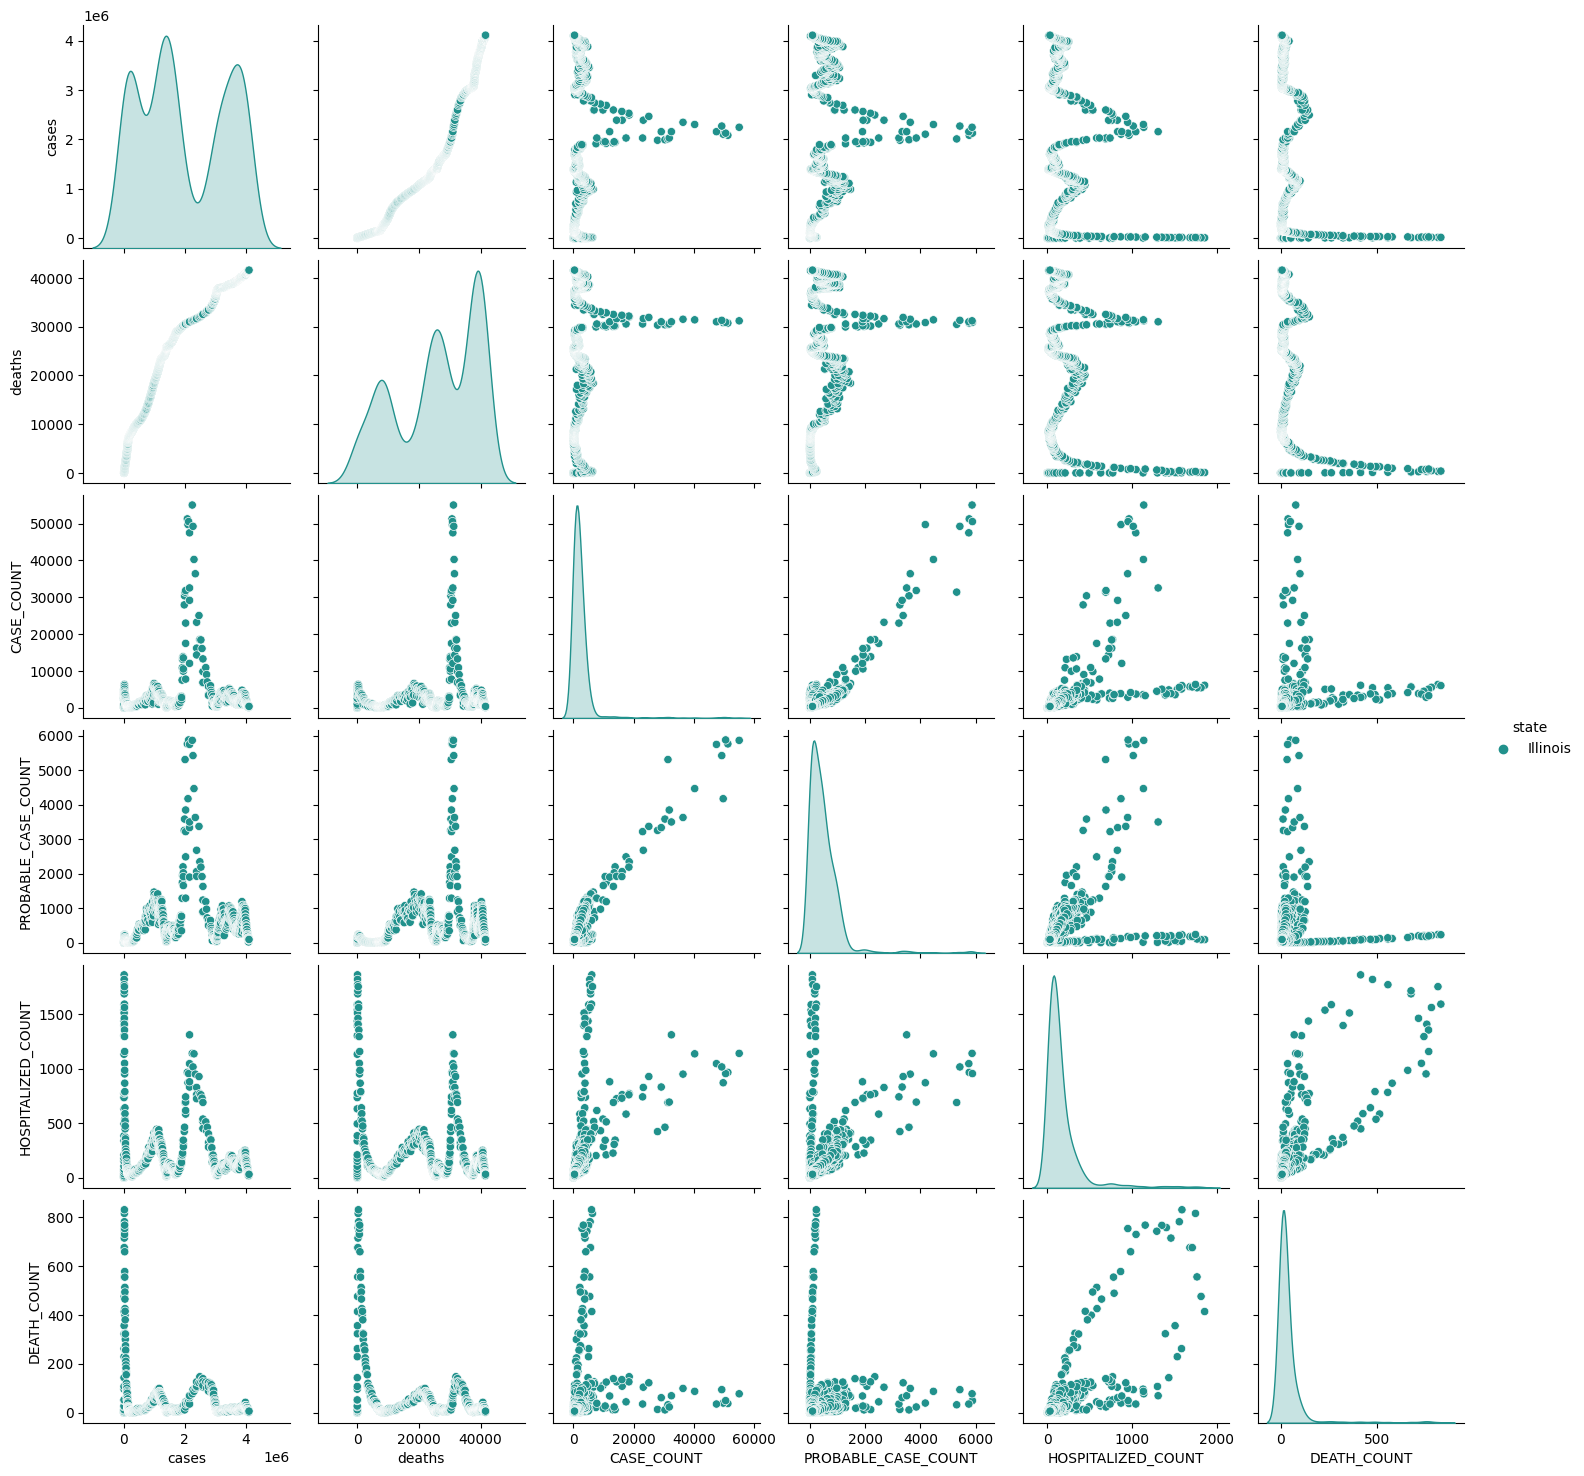

In [32]:
Illinois_df_columns['fips'] = Illinois_df_columns['fips'].astype(str)
sns.pairplot(Illinois_df_columns, hue='state', palette='viridis', markers='o')
plt.show()

# Covid Dataset from different contents and loactions

In [41]:
covid_2 = pd.read_csv('https://drive.google.com/uc?id=1KtSM_1WM9u-1o8tf0C6aXcu785BQ6MOo')
covid_2.shape

(302512, 67)

In [42]:
covid_2.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [43]:
covid_2.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [44]:
#getting the list of locations.
unique_location = set(covid_2['location'])
unique_location_list = list(unique_location)
print("Unique location:", unique_location_list)

Unique location: ['Bahrain', 'Rwanda', 'Afghanistan', 'Samoa', 'Burundi', 'Croatia', 'North Macedonia', 'Falkland Islands', 'Poland', 'Senegal', 'Russia', 'British Virgin Islands', 'Nigeria', 'Dominican Republic', 'Brazil', 'Chad', 'Saudi Arabia', 'European Union', 'South America', 'French Polynesia', 'United States Virgin Islands', 'Andorra', 'Trinidad and Tobago', 'Albania', 'Burkina Faso', 'Egypt', 'Montserrat', 'Netherlands', 'France', 'Namibia', 'French Guiana', 'Bermuda', 'South Africa', 'Cambodia', 'Dominica', 'Mauritania', 'North America', 'Gambia', 'Northern Ireland', 'Nepal', 'Spain', 'Greece', 'Jordan', 'Denmark', 'Tanzania', 'Kazakhstan', 'Mongolia', 'Cook Islands', 'Benin', 'Zambia', 'New Caledonia', 'Liechtenstein', 'Hong Kong', 'Democratic Republic of Congo', 'Japan', 'Paraguay', 'Serbia', 'Somalia', 'Reunion', 'South Korea', 'Timor', 'Taiwan', 'Tunisia', 'Faeroe Islands', 'Guyana', 'Canada', 'Tokelau', 'Lebanon', 'Tuvalu', 'Togo', 'Djibouti', 'Switzerland', 'Ireland', '

In [45]:
#getting the list of contents in the dataset.
unique_continent = set(covid_2['continent'])
unique_continent_list = list(unique_continent)
print("Unique continent:", unique_continent_list)

Unique continent: ['Asia', 'South America', nan, 'Europe', 'North America', 'Oceania', 'Africa']


In [46]:
#filterin the dataset to only two continents South America and North America
selected_regions = ['South America', 'North America']
covid_filtered = covid_2[covid_2['continent'].isin(selected_regions)]
covid_filtered.head()

iso_code      continent  location        date  total_cases  new_cases  \
8372      AIA  North America  Anguilla  2020-01-03          NaN        0.0   
8373      AIA  North America  Anguilla  2020-01-04          NaN        0.0   
8374      AIA  North America  Anguilla  2020-01-05          NaN        0.0   
8375      AIA  North America  Anguilla  2020-01-06          NaN        0.0   
8376      AIA  North America  Anguilla  2020-01-07          NaN        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
8372                 NaN           NaN         0.0                  NaN  ...   
8373                 NaN           NaN         0.0                  NaN  ...   
8374                 NaN           NaN         0.0                  NaN  ...   
8375                 NaN           NaN         0.0                  NaN  ...   
8376                 NaN           NaN         0.0                  NaN  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
8372           NaN                     NaN                         NaN   
8373           NaN                     NaN                         NaN   
8374           NaN                     NaN                         NaN   
8375           NaN                     NaN                         NaN   
8376           NaN                     NaN                         NaN   

      life_expectancy  human_development_index  population  \
8372            81.88                      NaN     15877.0   
8373            81.88                      NaN     15877.0   
8374            81.88                      NaN     15877.0   
8375            81.88                      NaN     15877.0   
8376            81.88                      NaN     15877.0   

      excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
8372                                   NaN                          NaN   
8373                                   NaN                          NaN   
8374                                   NaN                          NaN   
8375                                   NaN                          NaN   
8376                                   NaN                          NaN   

      excess_mortality  excess_mortality_cumulative_per_million  
8372               NaN                                      NaN  
8373               NaN                                      NaN  
8374               NaN                                      NaN  
8375               NaN                                      NaN  
8376               NaN                                      NaN  

[5 rows x 67 columns]

In [47]:
unique_location = set(covid_filtered['location'])
unique_location_list = list(unique_location)
print("Unique location:", unique_location_list)

Unique location: ['Guyana', 'Canada', 'Ecuador', 'Falkland Islands', 'Costa Rica', 'British Virgin Islands', 'Sint Maarten (Dutch part)', 'Cuba', 'Jamaica', 'Bolivia', 'Aruba', 'Dominican Republic', 'Guadeloupe', 'Guatemala', 'Saint Barthelemy', 'Saint Vincent and the Grenadines', 'Haiti', 'Brazil', 'Uruguay', 'Peru', 'Saint Martin (French part)', 'El Salvador', 'Bahamas', 'United States Virgin Islands', 'Trinidad and Tobago', 'Greenland', 'Mexico', 'Cayman Islands', 'Colombia', 'Montserrat', 'Grenada', 'Honduras', 'Nicaragua', 'Antigua and Barbuda', 'Saint Kitts and Nevis', 'Bonaire Sint Eustatius and Saba', 'French Guiana', 'Saint Pierre and Miquelon', 'Bermuda', 'Turks and Caicos Islands', 'Dominica', 'Venezuela', 'Puerto Rico', 'Anguilla', 'Martinique', 'Belize', 'Panama', 'Argentina', 'Chile', 'Paraguay', 'Barbados', 'Suriname', 'Curacao', 'United States', 'Saint Lucia']


In [48]:
#Filtering the dataset to only United States in the location.
selected_regions = ['United States']
covid_filtered_country = covid_2[covid_2['location'].isin(selected_regions)]
covid_filtered_country.head()

iso_code      continent       location        date  total_cases  \
284667      USA  North America  United States  2020-01-03          NaN   
284668      USA  North America  United States  2020-01-04          NaN   
284669      USA  North America  United States  2020-01-05          NaN   
284670      USA  North America  United States  2020-01-06          NaN   
284671      USA  North America  United States  2020-01-07          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
284667        0.0                 NaN           NaN         0.0   
284668        0.0                 NaN           NaN         0.0   
284669        0.0                 NaN           NaN         0.0   
284670        0.0                 NaN           NaN         0.0   
284671        0.0                 NaN           NaN         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
284667                  NaN  ...          24.6                     NaN   
284668                  NaN  ...          24.6                     NaN   
284669                  NaN  ...          24.6                     NaN   
284670                  NaN  ...          24.6                     NaN   
284671                  NaN  ...          24.6                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
284667                        2.77            78.86                    0.926   
284668                        2.77            78.86                    0.926   
284669                        2.77            78.86                    0.926   
284670                        2.77            78.86                    0.926   
284671                        2.77            78.86                    0.926   

         population  excess_mortality_cumulative_absolute  \
284667  338289856.0                                   NaN   
284668  338289856.0                                   NaN   
284669  338289856.0                               -2336.0   
284670  338289856.0                                   NaN   
284671  338289856.0                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
284667                          NaN               NaN   
284668                          NaN               NaN   
284669                        -3.72             -3.72   
284670                          NaN               NaN   
284671                          NaN               NaN   

        excess_mortality_cumulative_per_million  
284667                                      NaN  
284668                                      NaN  
284669                                -6.953581  
284670                                      NaN  
284671                                      NaN  

[5 rows x 67 columns]

In [49]:
covid_filtered_country.shape

(1196, 67)

In [50]:
#droping null columns.
covid_filtered_country_clean = covid_filtered_country.dropna(axis=1)
covid_filtered_country_clean.shape

(1196, 20)

In [51]:
covid_filtered_country_clean.head()

iso_code      continent       location        date  new_cases  \
284667      USA  North America  United States  2020-01-03        0.0   
284668      USA  North America  United States  2020-01-04        0.0   
284669      USA  North America  United States  2020-01-05        0.0   
284670      USA  North America  United States  2020-01-06        0.0   
284671      USA  North America  United States  2020-01-07        0.0   

        new_cases_per_million  population_density  median_age  aged_65_older  \
284667                    0.0              35.608        38.3         15.413   
284668                    0.0              35.608        38.3         15.413   
284669                    0.0              35.608        38.3         15.413   
284670                    0.0              35.608        38.3         15.413   
284671                    0.0              35.608        38.3         15.413   

        aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
284667          9.732       54225.446              1.2                151.089   
284668          9.732       54225.446              1.2                151.089   
284669          9.732       54225.446              1.2                151.089   
284670          9.732       54225.446              1.2                151.089   
284671          9.732       54225.446              1.2                151.089   

        diabetes_prevalence  female_smokers  male_smokers  \
284667                10.79            19.1          24.6   
284668                10.79            19.1          24.6   
284669                10.79            19.1          24.6   
284670                10.79            19.1          24.6   
284671                10.79            19.1          24.6   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
284667                        2.77            78.86                    0.926   
284668                        2.77            78.86                    0.926   
284669                        2.77            78.86                    0.926   
284670                        2.77            78.86                    0.926   
284671                        2.77            78.86                    0.926   

         population  
284667  338289856.0  
284668  338289856.0  
284669  338289856.0  
284670  338289856.0  
284671  338289856.0

In [52]:
# Check common column values
# beforing megring the datasets.
common_dates = set(Illinois_df_columns['date']).intersection(covid_filtered_country_clean['date'])
print("Common Dates:", common_dates)

print("Data Types - Illinois_df_columns:")
print(Illinois_df_columns.dtypes)
print("\nData Types - covid_filtered_country_clean:")
print(covid_filtered_country_clean.dtypes)

print("Unique Dates - Illinois_df_columns:")
print(Illinois_df_columns['date'].unique())
print("\nUnique Dates - covid_filtered_country_clean:")
print(covid_filtered_country_clean['date'].unique())


Common Dates: set()
Data Types - Illinois_df_columns:
date                    object
state                   object
fips                    object
cases                    int64
deaths                   int64
CASE_COUNT             float64
PROBABLE_CASE_COUNT    float64
HOSPITALIZED_COUNT     float64
DEATH_COUNT            float64
dtype: object

Data Types - covid_filtered_country_clean:
iso_code                       object
continent                      object
location                       object
date                           object
new_cases                     float64
new_cases_per_million         float64
population_density            float64
median_age                    float64
aged_65_older                 float64
aged_70_older                 float64
gdp_per_capita                float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
h

In [53]:
#changing the date attribute to fit the merging of the datasets.
covid_filtered_country_clean['date'] = pd.to_datetime(covid_filtered_country_clean['date']).dt.date

<ipython-input-53-b75c7a44478a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_filtered_country_clean['date'] = pd.to_datetime(covid_filtered_country_clean['date']).dt.date


In [54]:
#merging the datasets.
merged_data = pd.merge(Illinois_df_columns, covid_filtered_country_clean, on=['date'], how='left')
merged_data.shape

(1119, 28)

In [55]:
merged_data.head()

date     state fips  cases  deaths  CASE_COUNT  PROBABLE_CASE_COUNT  \
0  2020-02-29  Illinois   17      3       0         1.0                  0.0   
1  2020-03-01  Illinois   17      3       0         0.0                  0.0   
2  2020-03-02  Illinois   17      4       0         0.0                  0.0   
3  2020-03-03  Illinois   17      4       0         1.0                  0.0   
4  2020-03-04  Illinois   17      4       0         5.0                  0.0   

   HOSPITALIZED_COUNT  DEATH_COUNT iso_code  ... gdp_per_capita  \
0                 1.0          0.0      USA  ...      54225.446   
1                 1.0          0.0      USA  ...      54225.446   
2                 2.0          0.0      USA  ...      54225.446   
3                 7.0          0.0      USA  ...      54225.446   
4                 2.0          0.0      USA  ...      54225.446   

  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
0             1.2                151.089                10.79            19.1   
1             1.2                151.089                10.79            19.1   
2             1.2                151.089                10.79            19.1   
3             1.2                151.089                10.79            19.1   
4             1.2                151.089                10.79            19.1   

   male_smokers  hospital_beds_per_thousand  life_expectancy  \
0          24.6                        2.77            78.86   
1          24.6                        2.77            78.86   
2          24.6                        2.77            78.86   
3          24.6                        2.77            78.86   
4          24.6                        2.77            78.86   

   human_development_index   population  
0                    0.926  338289856.0  
1                    0.926  338289856.0  
2                    0.926  338289856.0  
3                    0.926  338289856.0  
4                    0.926  338289856.0  

[5 rows x 28 columns]

In [56]:
#Dropping null rows.
covid_nan =merged_data.dropna()
covid_nan.shape

(1119, 28)

In [57]:
covid_nan.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'CASE_COUNT',
       'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'iso_code',
       'continent', 'location', 'new_cases', 'new_cases_per_million',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'population'],
      dtype='object')

In [58]:
#showing the describtion of the dataset.
summary_stats = covid_nan.describe()
summary_stats

cases        deaths    CASE_COUNT  PROBABLE_CASE_COUNT  \
count  1.119000e+03   1119.000000   1119.000000          1119.000000   
mean   1.951765e+06  25767.428061   2432.903485           476.436997   
std    1.401223e+06  13120.801278   4961.815795           622.639647   
min    3.000000e+00      0.000000      0.000000             0.000000   
25%    7.765685e+05  13918.000000    580.500000            95.000000   
50%    1.569206e+06  26845.000000   1444.000000           352.000000   
75%    3.384292e+06  38401.000000   2775.000000           647.000000   
max    4.107931e+06  41618.000000  55041.000000          5882.000000   

       HOSPITALIZED_COUNT  DEATH_COUNT     new_cases  new_cases_per_million  \
count         1119.000000  1119.000000  1.119000e+03            1119.000000   
mean           171.395889    40.342270  9.163944e+04             270.890294   
std            245.794414    98.600112  1.285954e+05             380.133724   
min              1.000000     0.000000  0.000000e+00               0.000000   
25%             47.000000     7.000000  2.431900e+04              71.888000   
50%            102.000000    13.000000  5.421600e+04             160.265000   
75%            184.000000    31.000000  1.190160e+05             351.817000   
max           1858.000000   831.000000  1.265520e+06            3740.934000   

       population_density    median_age  ...  gdp_per_capita  extreme_poverty  \
count            1119.000  1.119000e+03  ...        1119.000           1119.0   
mean               35.608  3.830000e+01  ...       54225.446              1.2   
std                 0.000  1.421721e-14  ...           0.000              0.0   
min                35.608  3.830000e+01  ...       54225.446              1.2   
25%                35.608  3.830000e+01  ...       54225.446              1.2   
50%                35.608  3.830000e+01  ...       54225.446              1.2   
75%                35.608  3.830000e+01  ...       54225.446              1.2   
max                35.608  3.830000e+01  ...       54225.446              1.2   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count           1.119000e+03              1119.00    1.119000e+03   
mean            1.510890e+02                10.79    1.910000e+01   
std             2.843442e-14                 0.00    7.108604e-15   
min             1.510890e+02                10.79    1.910000e+01   
25%             1.510890e+02                10.79    1.910000e+01   
50%             1.510890e+02                10.79    1.910000e+01   
75%             1.510890e+02                10.79    1.910000e+01   
max             1.510890e+02                10.79    1.910000e+01   

       male_smokers  hospital_beds_per_thousand  life_expectancy  \
count  1.119000e+03                     1119.00          1119.00   
mean   2.460000e+01                        2.77            78.86   
std    7.108604e-15                        0.00             0.00   
min    2.460000e+01                        2.77            78.86   
25%    2.460000e+01                        2.77            78.86   
50%    2.460000e+01                        2.77            78.86   
75%    2.460000e+01                        2.77            78.86   
max    2.460000e+01                        2.77            78.86   

       human_development_index   population  
count             1.119000e+03       1119.0  
mean              9.260000e-01  338289856.0  
std               1.110719e-16          0.0  
min               9.260000e-01  338289856.0  
25%               9.260000e-01  338289856.0  
50%               9.260000e-01  338289856.0  
75%               9.260000e-01  338289856.0  
max               9.260000e-01  338289856.0  

[8 rows x 22 columns]

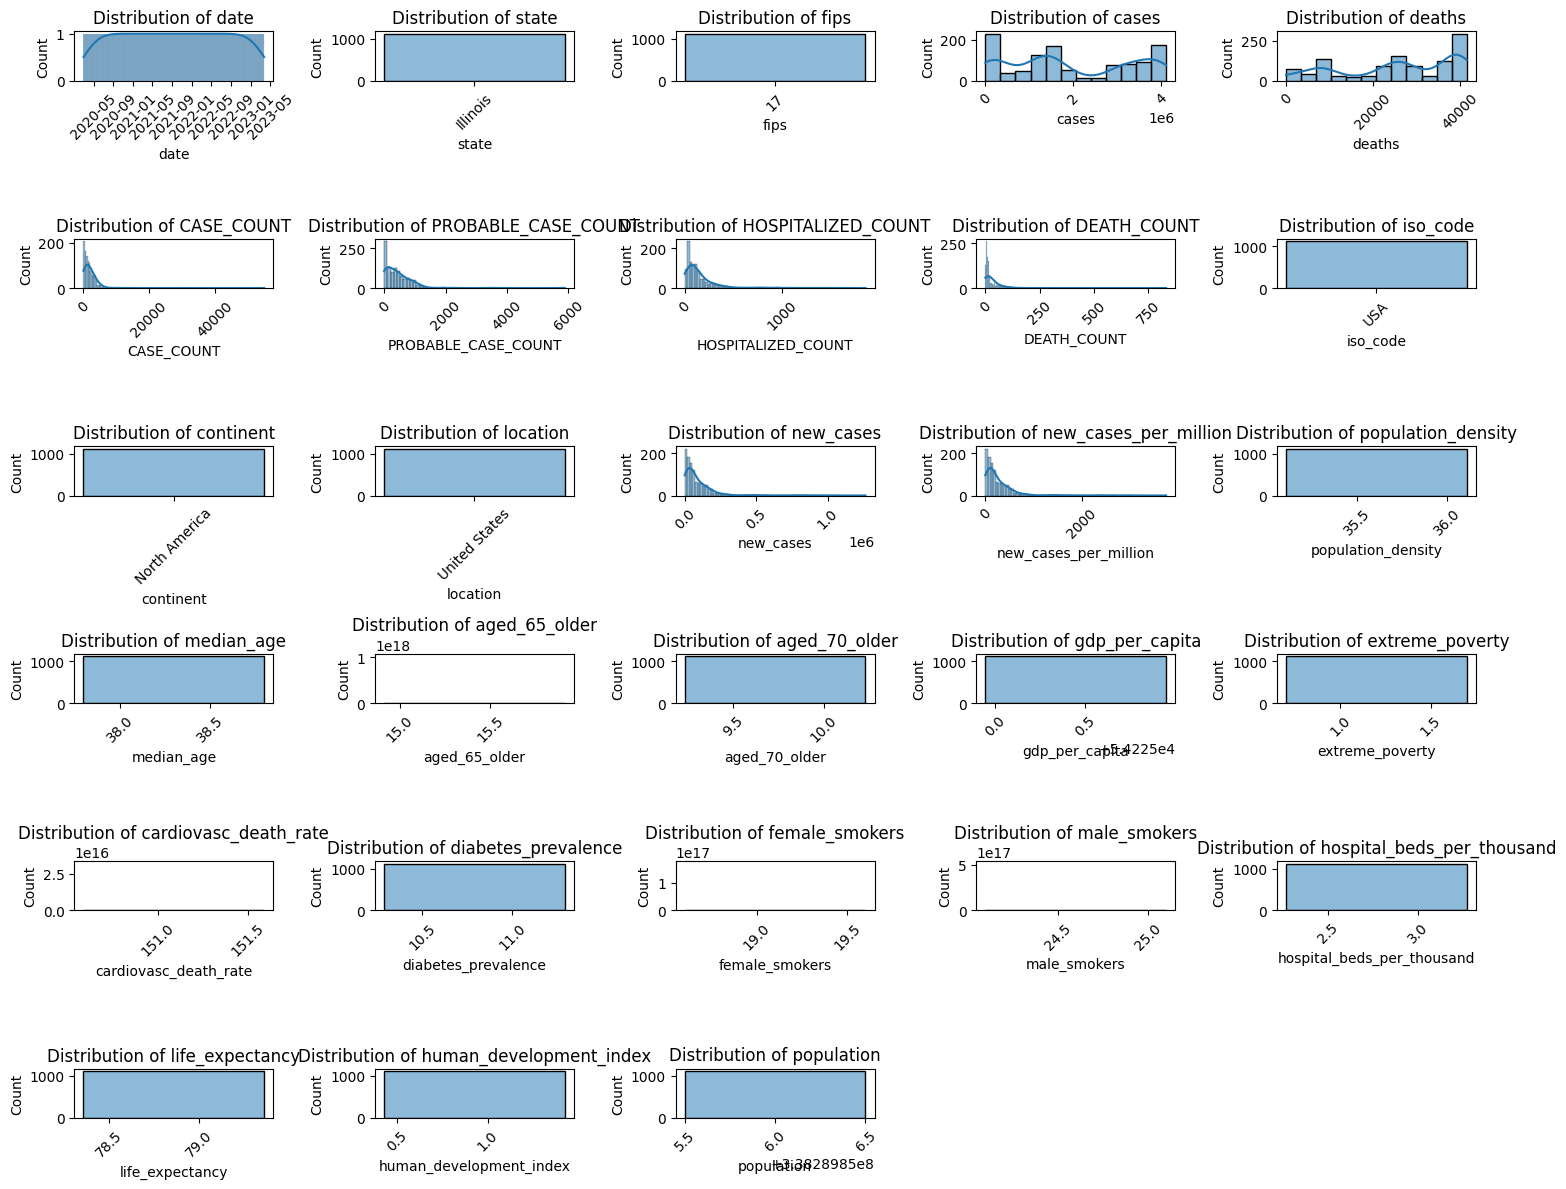

In [59]:
#plotting the distribution of the attributes in the dataset.
num_cols = len(covid_nan.columns)
num_rows = (num_cols // 5) + 1
plt.figure(figsize=(15, 12))
for i, column in enumerate(covid_nan.columns):
  plt.subplot(num_rows, 5, i + 1)
  sns.histplot(covid_nan[column], kde=True)
  plt.xticks(rotation=45)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Regression.

Mean Squared Error: 13583786.880099332


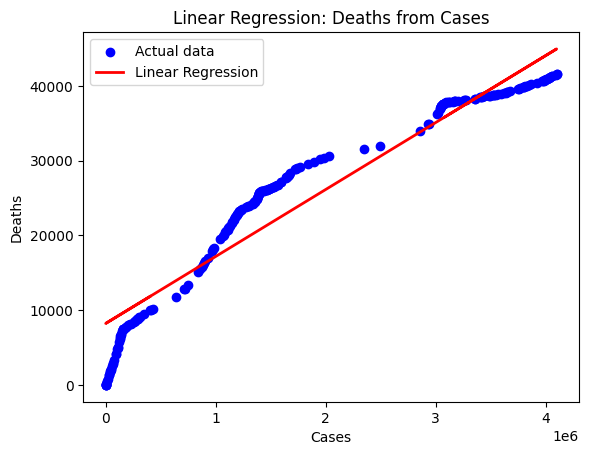

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = covid_nan[['cases']]
y = covid_nan['deaths']

#spliting the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression: Deaths from Cases')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()

**Graph analysis.**

The graph displays a linear correlation between the two attributes cases and deaths.

In [61]:
#Aggretating the deaths and DEATH_COUNT.
covid_nan['deaths'].groupby(covid_nan['DEATH_COUNT']).agg(['count','min','mean','median','max', 'std','var'])

count   min          mean   median    max           std  \
DEATH_COUNT                                                            
0.0             15     0   1165.866667      0.0   9071   3079.195787   
1.0              6     0  14663.000000   8232.0  37840  14136.663850   
2.0             21  7718  22488.000000  25755.0  41573  11284.743989   
3.0             34     0  20491.176471  17627.5  41573  13602.754555   
4.0             52     0  25496.250000  25898.5  41573  12755.706670   
...            ...   ...           ...      ...    ...           ...   
767.0            1   534    534.000000    534.0    534           NaN   
768.0            1   800    800.000000    800.0    800           NaN   
782.0            1   464    464.000000    464.0    464           NaN   
816.0            1   309    309.000000    309.0    309           NaN   
831.0            1   384    384.000000    384.0    384           NaN   

                      var  
DEATH_COUNT                
0.0          9.481447e+06  
1.0          1.998453e+08  
2.0          1.273454e+08  
3.0          1.850349e+08  
4.0          1.627081e+08  
...                   ...  
767.0                 NaN  
768.0                 NaN  
782.0                 NaN  
816.0                 NaN  
831.0                 NaN  

[160 rows x 7 columns]

<Axes: xlabel='state', ylabel='deaths'>

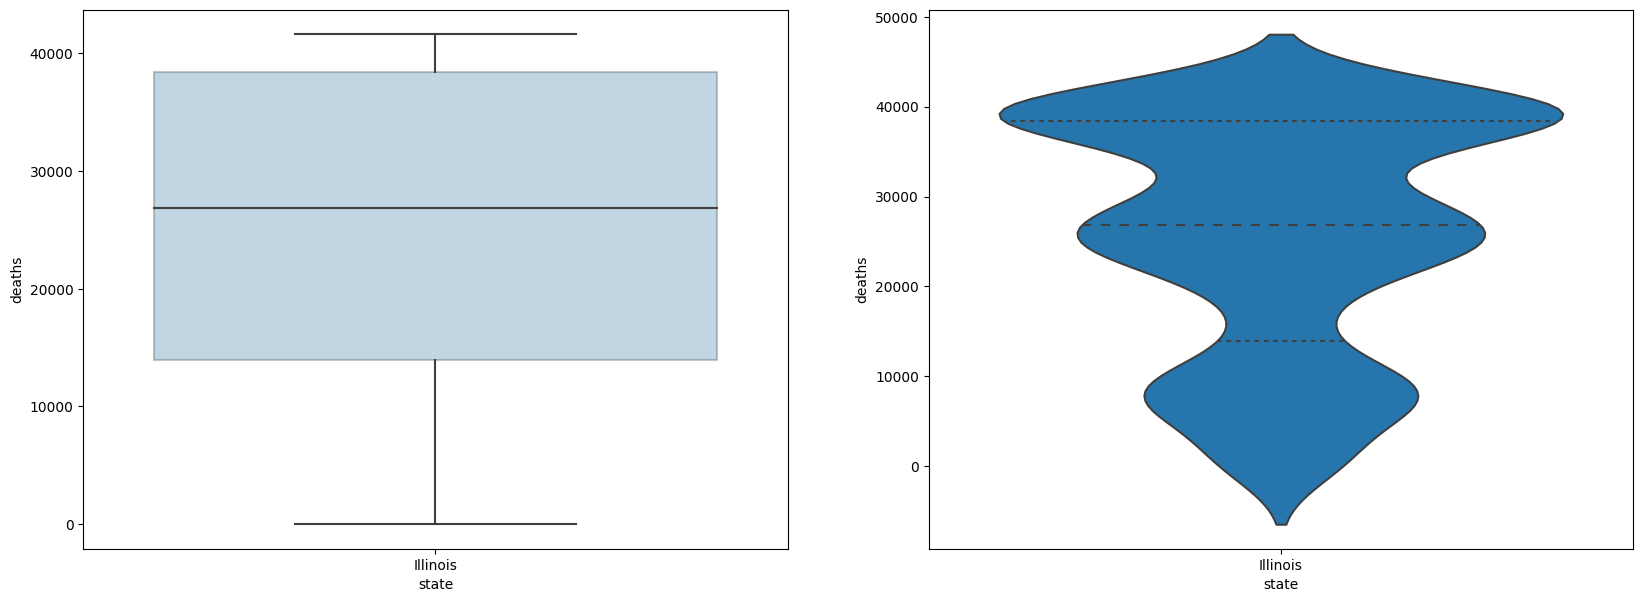

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(ax = ax1, x = 'state', y = 'deaths', data = covid_nan, boxprops=dict(alpha=.3))
sns.violinplot(ax = ax2, x = 'state', y = 'deaths', data = covid_nan, inner="quartiles", saturation=0.9)

state
Illinois    Axes(0.125,0.11;0.775x0.77)
Name: DEATH_COUNT, dtype: object

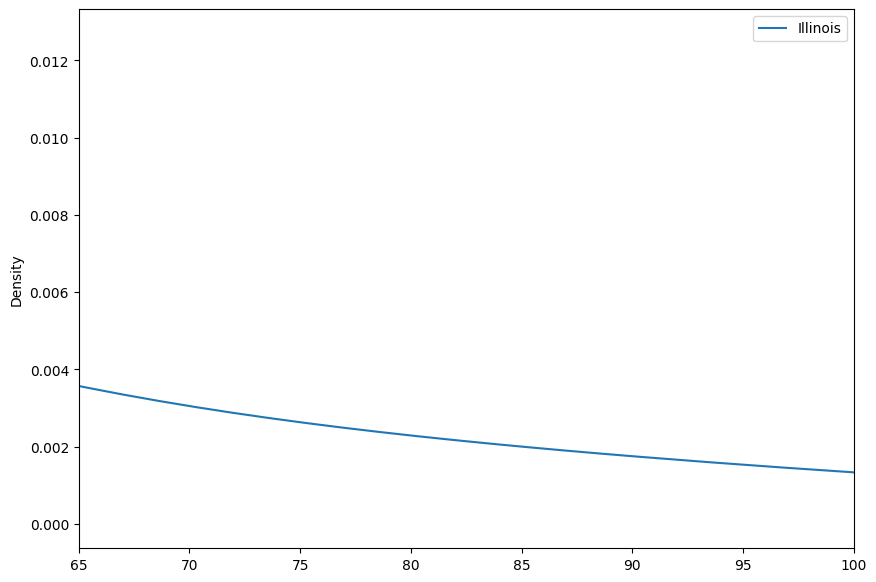

In [63]:
covid_nan.groupby('state')['DEATH_COUNT'].plot.kde(
    xlim=(65,100),
    legend=True,
    figsize=(10,7))

In [64]:
aggregated_data = covid_nan.groupby('state')['DEATH_COUNT'].agg(['sum', 'mean', 'median', 'std', 'count'])
aggregated_data

sum      mean  median        std  count
state                                                
Illinois  45143.0  40.34227    13.0  98.600112   1119

In [65]:
aggregated_data = covid_nan.groupby('state')['deaths'].agg(['sum', 'mean', 'median', 'std', 'count'])
aggregated_data

sum          mean   median           std  count
state                                                         
Illinois  28833752  25767.428061  26845.0  13120.801278   1119

<Axes: xlabel='deaths', ylabel='DEATH_COUNT'>

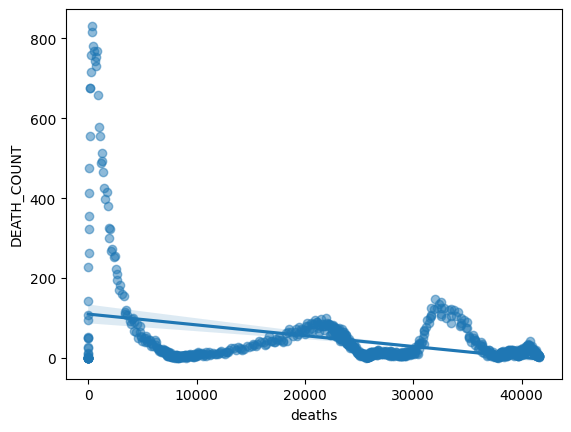

In [66]:
sns.regplot(x="deaths", y="DEATH_COUNT", data=covid_nan, scatter_kws={'alpha':0.5})

<Axes: xlabel='cases', ylabel='deaths'>

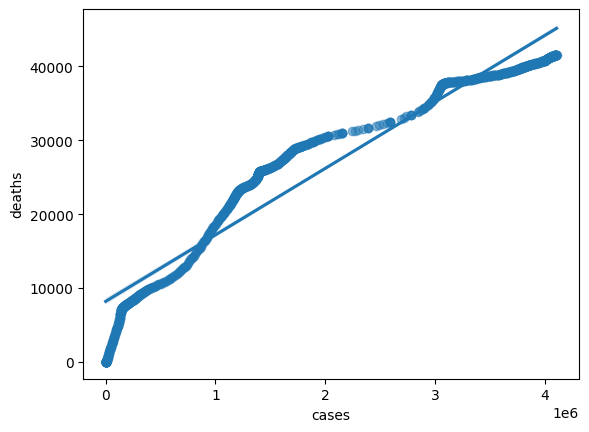

In [67]:
sns.regplot(x="cases", y="deaths", data=covid_nan, scatter_kws={'alpha':0.5})

<ipython-input-68-90f4751a6625>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_nan.iloc[:,:10].corr('spearman'), center=0, cmap='RdYlBu')


<Axes: >

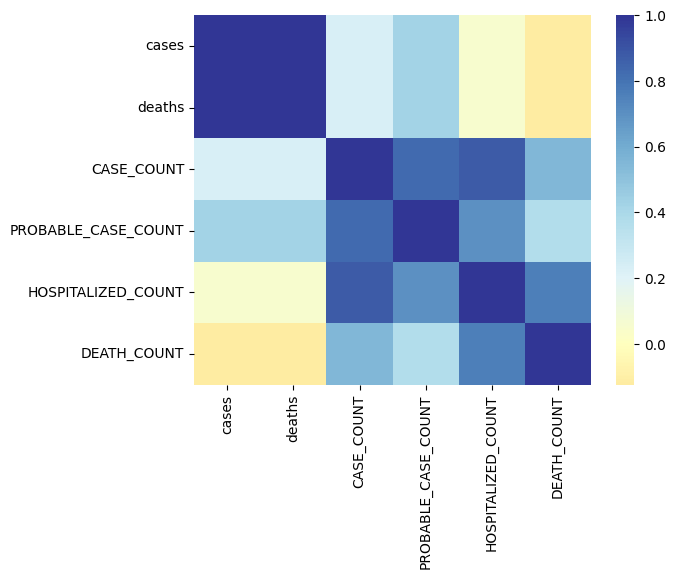

In [68]:
sns.heatmap(covid_nan.iloc[:,:10].corr('spearman'), center=0, cmap='RdYlBu')

# **Conclusion.**

Finally, the analysis sheds light into how different regions were affected by the pandemic particularly Illinois in the US. Examining this correlation between the reported cases and deaths has enabled us to determine some critical trends and patterns on how the pandemic spread. Through an examination of the data in relation with states such as the one in Illinois provides us detailed information which contributes towards the holistic comprehension of the statewise variations in the fight against Covid-19.

Additionally, i have investigated death rates nationally and in the state of Illinois which provides some key insights on health policies and interventions. Although i have focused mainly on Illinois, the impact is beyond borders of states. The analysis contributes both to understanding situation in the state of Illinois and informing answers and policymaking at the highest level, nationally. As such, the project undertaken in the state of Illinois contributes greatly to the cumulative knowledge, which is an important component of the battle against the spread and effects of Covid-19 in the whole of the US.